In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
from transformers import pipeline

2021-10-01 11:28:34.976835: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.11.0


In [3]:
!pip install youtube_transcript_api

In [4]:
from youtube_transcript_api import YouTubeTranscriptApi

In [5]:
youtube_video = "https://www.youtube.com/watch?v=0bi1PvXCbr8"

In [6]:
video_id = youtube_video.split("=")[1]

In [7]:
video_id

'0bi1PvXCbr8'

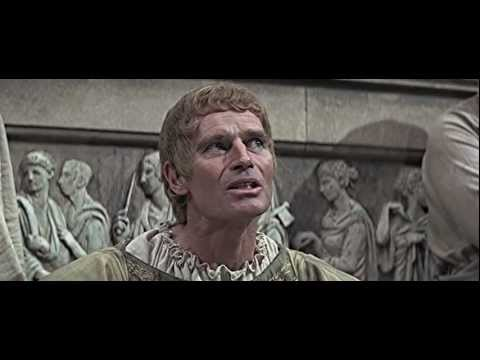

In [8]:
from IPython.display import YouTubeVideo
YouTubeVideo(video_id)

In [9]:
YouTubeTranscriptApi.get_transcript(video_id)
transcript = YouTubeTranscriptApi.get_transcript(video_id)

In [10]:
transcript[0:5]

[{'text': "He says, for Brutus' sake,\nHe finds himself beholding to us all.",
  'start': 0.5,
  'duration': 4.56},
 {'text': "Fourth Citizen\n'Twere best he speak no harm of Brutus here.",
  'start': 5.06,
  'duration': 3.77},
 {'text': 'First Citizen\nThis Caesar was a tyrant.',
  'start': 8.83,
  'duration': 1.599},
 {'text': "Third Citizen\nNay, that's certain:",
  'start': 10.429,
  'duration': 1.151},
 {'text': 'We are blest that Rome is rid of him.',
  'start': 11.58,
  'duration': 2.059}]

In [11]:
result = ""
for i in transcript:
    result += ' ' + i['text']
#print(result)
print(len(result))

8320


In [12]:
summarizer = pipeline('summarization')

Downloading:   0%|          | 0.00/1.80k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.22G [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/899k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/456k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

In [13]:
num_iters = int(len(result)/1000)
summarized_text = []
for i in range(0, num_iters + 1):
  start = 0
  start = i * 1000
  end = (i + 1) * 1000
  print("input text \n" + result[start:end])
  out = summarizer(result[start:end])
  out = out[0]
  out = out['summary_text']
  print("Summarized text\n"+out)
  summarized_text.append(out)

#print(summarized_text)

input text 
 He says, for Brutus' sake,
He finds himself beholding to us all. Fourth Citizen
'Twere best he speak no harm of Brutus here. First Citizen
This Caesar was a tyrant. Third Citizen
Nay, that's certain: We are blest that Rome is rid of him. Second Citizen
Peace! let us hear what Antony can say. ANTONY
You gentle Romans,-- Citizens
Peace, ho! let us hear him. ANTONY
Friends, Romans, countrymen, lend me your ears;
I come to bury Caesar, not to praise him. The evil that men do lives after them;
The good is oft interred with their bones; So let it be with Caesar. The noble Brutus
Hath told you Caesar was ambitious: If it were so, it was a grievous fault,
And grievously hath Caesar answer'd it. Here, under leave of Brutus and the rest--
For Brutus is an honourable man; So are they all, all honourable men--
Come I to speak in Caesar's funeral. He was my friend, faithful and just to me:
But Brutus says he was ambitious; And Brutus is an honourable man. He hath brought many captives 

Your max_length is set to 142, but you input_length is only 82. You might consider decreasing max_length manually, e.g. summarizer('...', max_length=50)


Summarized text
 First Citizen: We'll burn the house of Brutus. We'll revenge his death. Second Citizen: Most noble Caesar! We'll revenge his death. Third Citizen: We'll mutiny. First Citizen; we'll burn Brutus' house .
input text 
this side Tiber; he hath left them you, And to your heirs for ever, common pleasures,
To walk abroad, and recreate yourselves. Here was a Caesar! when comes such another? First Citizen
Never, never. Come, away, away! We'll burn his body in the holy place,
And with the brands fire the traitors' houses. Take up the body.
Summarized text
 We'll burn his body in the holy place, and with the brands fire the traitors' houses. Take up the body. this side Tiber; he hath left them you, And to your heirs for ever, common pleasures, to walk abroad, and recreate yourselves.


In [14]:
len(str(summarized_text))

2566

In [15]:
str(summarized_text)

'[" Antony: \'I come to bury Caesar, not to praise him. The evil that men do lives after them; the good is oft interred with their bones; So let it be with Caesar. The noble Brutus tells you Caesar was ambitious: If it were so, it was a grievous fault, and grievously hath Caesar answer\'d it. Here, under leave of Brutus and the rest--", \' First Citizen: "If thou consider rightly of the matter, Caesar has had great wrong" Second Citizen:\\xa0"If thee consider rightly, Caesar\\\'s had great right wrong. I fear there will be a worse come in his plaudits" Third Citizen: \\\'If thee think there is much reason in his sayings. And, sure, he is an honourable man\\\'\', \' First Citizen: If I were disposed to stir your hearts and minds to mutiny and rage, I should do Brutus wrong, and Cassius wrong, I rather choose to wrong the dead, to wrong myself and you, Than I will wrong such honourable men. ace ace .\', " We\'ll hear the will: read it, Mark Antony. All we will hear Caesar\'s will. Antony

# News Article

In [16]:
result="""India has approved a new COVID-19 vaccine that uses circular strands of DNA to prime the immune system against the virus SARS-CoV-2. Researchers have welcomed news of the first DNA vaccine for people to receive approval anywhere in the world, and say many other DNA vaccines might soon be hot on its heels.

ZyCoV-D, which is administered into the skin without an injection, has been found to be 67% protective against symptomatic COVID-19 in clinical trials, and will probably start to be administered in India this month. Although the efficacy is not particularly high compared to that of many other COVID-19 vaccines, the fact that it is a DNA vaccine is significant, say researchers.

It is proof of the principle that DNA vaccines work and can help in controlling the pandemic, says Peter Richmond, a paediatric immunologist at the University of Western Australia in Perth. “This is a really important step forward in the fight to defeat COVID-19 globally, because it demonstrates that we have another class of vaccines that we can use.”

Close to a dozen DNA vaccines against COVID-19 are in clinical trials globally, and at least as many again are in earlier stages of development. DNA vaccines are also being developed for many other diseases.

“If DNA vaccines prove to be successful, this is really the future of vaccinology” because they are easy to manufacture, says Shahid Jameel, a virologist at Ashoka University in Sonipat, India.

Fast-tracked development
The urgency of combating COVID-19 has fast-tracked the development of vaccines that use genetic technology, such as messenger RNA and DNA vaccines, says David Weiner, director of the Vaccine & Immunotherapy Center at the Wistar Institute in Philadelphia, Pennsylvania.

RNA vaccines were quicker to show strong immune responses in clinical trials; they have now been delivered to hundreds of millions of people around the world. But DNA vaccines have a number of benefits, because they are easy to produce and the finished products are more stable than mRNA vaccines, which typically require storage at very low temperatures.

ZyCoV-D was developed by Indian pharmaceutical firm Zydus Cadila, headquartered in Ahmedabad. On 20 August, India’s drug regulator authorized the vaccine for people aged 12 and older. The efficacy figure of 67% came from trials involving more than 28,000 participants, which saw 21 symptomatic cases of COVID-19 in the vaccinated group and 60 among people who received a placebo.

ZyCoV-D contains circular strands of DNA known as plasmids, which encode the spike protein of SARS-CoV-2, together with a promoter sequence for turning the gene on. Once the plasmids enter the nuclei of cells, they are converted into mRNA, which travels to the main body of the cell, the cytoplasm, and is translated into the spike protein itself. The body’s immune system then mounts a response against the protein, and produces tailored immune cells that can clear future infections. Plasmids typically degrade within weeks to months, but the immunity remains.

Both DNA and mRNA vaccines have been under development since the 1990s, says Weiner. The challenge for DNA vaccines is that they need to make it all the way to the cell nucleus, unlike mRNA vaccines, which just need to get to the cytoplasm, says Jameel. So, for a long time, DNA vaccines struggled to induce potent immune responses in clinical trials, which is why they had been approved for use as vaccines only in animals, such as horses, until now.

Injection-free vaccine
To solve this problem, ZyCoV-D is deposited under the skin, as opposed to deep in muscle tissue. The area under the skin is rich in immune cells that gobble up foreign objects, such as vaccine particles, and process them. “This helps capture the DNA far more efficiently than in the muscle,” Jameel says. Unusually, the vaccine is delivered using a needle-free device pressed against the skin, which creates a fine, high-pressure stream of fluid that punctures the surface and is less painful than an injection.

But despite being more potent than previous DNA vaccines, ZyCoV-D requires a minimum of three doses to achieve its initial efficacy. This is likely to add to the logistical challenge of administering the vaccine during the current pandemic, says Jameel.

Although ZyCoV-D’s efficacy seems to be lower than the 90% or higher achieved by some mRNA vaccines, the figures are not comparable, says Jameel. The ZyCoV-D trials in India earlier this year were conducted while the Delta variant of SARS-CoV-2 was the dominant variant in circulation, whereas earlier mRNA vaccine trials were conducted when less transmissible variants were circulating. “The efficacy is essentially against the Delta variant, so that is pretty good,” he says.

Some researchers have criticized a lack of transparency in the approval process, because no late-stage trial results have yet been published. Zydus Cadila says the trial is still under way and it will submit the full analysis for publication shortly. The company says the first doses will start to be administered in India in September and it plans to produce up to 50 million doses by early next year.
"""

In [17]:
num_iters = int(len(result)/1000)
summarized_text = []
for i in range(0, num_iters + 1):
  start = 0
  start = i * 1000
  end = (i + 1) * 1000
  print("input text \n" + result[start:end])
  out = summarizer(result[start:end])
  out = out[0]
  out = out['summary_text']
  print("Summarized text\n"+out)
  summarized_text.append(out)

input text 
India has approved a new COVID-19 vaccine that uses circular strands of DNA to prime the immune system against the virus SARS-CoV-2. Researchers have welcomed news of the first DNA vaccine for people to receive approval anywhere in the world, and say many other DNA vaccines might soon be hot on its heels.

ZyCoV-D, which is administered into the skin without an injection, has been found to be 67% protective against symptomatic COVID-19 in clinical trials, and will probably start to be administered in India this month. Although the efficacy is not particularly high compared to that of many other COVID-19 vaccines, the fact that it is a DNA vaccine is significant, say researchers.

It is proof of the principle that DNA vaccines work and can help in controlling the pandemic, says Peter Richmond, a paediatric immunologist at the University of Western Australia in Perth. “This is a really important step forward in the fight to defeat COVID-19 globally, because it demonstrates th

Your max_length is set to 142, but you input_length is only 37. You might consider decreasing max_length manually, e.g. summarizer('...', max_length=50)


Summarized text
 Despite being more potent than previous DNA vaccines, ZyCoV-D requires a minimum of three doses to achieve its initial efficacy . This is likely to add to the logistical challenge of administering the vaccine during the current pandemic . Some researchers have criticized a lack of transparency in the approval process, because no late-stage trial results have yet been published .
input text 
blication shortly. The company says the first doses will start to be administered in India in September and it plans to produce up to 50 million doses by early next year.

Summarized text
 The company says the first doses will start to be administered in India in September . It plans to produce up to 50 million doses of the drug by early next year . The company plans to be able to use the drug in up to half a million doses by early 2015 .


In [18]:
len(str(summarized_text))

1826

In [19]:
str(summarized_text)

"[' India has approved a new COVID-19 vaccine that uses circular strands of DNA to prime the immune system against the virus SARS-CoV-2 . Researchers welcome news of the first DNA vaccine for people to receive approval anywhere in the world, and say many other DNA vaccines might soon be hot on its heels .', ' Close to a dozen DNA vaccines against COVID-19 are in clinical trials globally, and at least as many again are in earlier stages of development . DNA vaccines are also being developed for many other diseases, says Shahid Jameel, a virologist at Ashoka University in India .', ' The efficacy figure of 67% came from trials involving more than 28,000 participants, which saw 21 symptomatic cases of COVID-19 in the vaccinated group and 60 among people who received a placebo . India’s drug regulator authorized the vaccine for people aged 12 and older .', ' DNA and mRNA vaccines have been under development since the 1990s . The challenge for DNA vaccines is that they need to make it all t